## The Kernel Density Estimation Plot
The KDE plot maps an estimate of a probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

Relative to a histogram, KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions. But it has the potential to introduce distortions if the underlying distribution is bounded or not smooth. Like a histogram, the quality of the representation also depends on the selection of good smoothing parameters.

In [1]:
# Basic Library
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings;
warnings.filterwarnings('ignore')

In [5]:
cars = sns.load_dataset('mpg').dropna()
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
cars.shape

(392, 9)

## Univariate (1D)

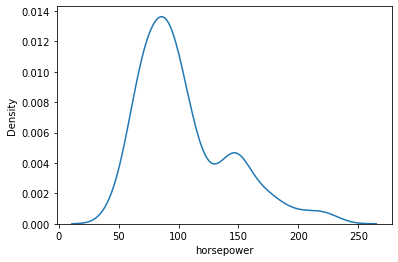

In [7]:
sns.kdeplot(x='horsepower', data=cars);
# sns.kdeplot(cars.horsepower);

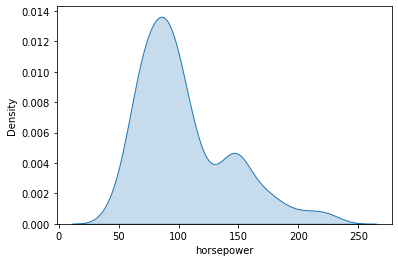

In [8]:
sns.kdeplot(cars.horsepower, shade=True);

In [ ]:
# Cut Off KDE
# We could cut off the KDE if we know our data has hard limits 
# (no one can be a negative age and no one in the population can be older than 100 for some reason)

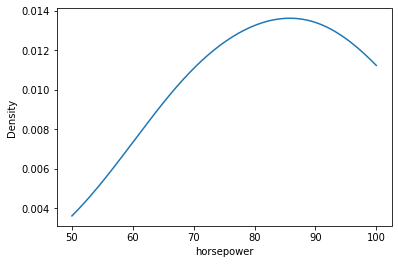

In [9]:
sns.kdeplot(x='horsepower', data=cars, clip=[50,100]);

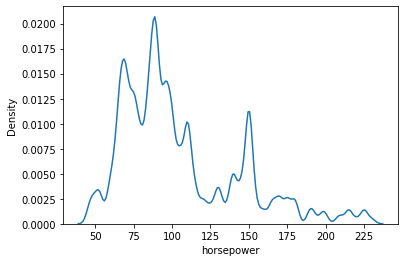

In [14]:
# Bandwidth

sns.kdeplot(cars.horsepower, bw_adjust=0.2);  # default = 1

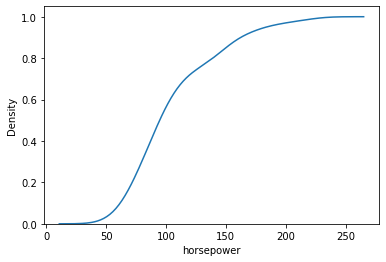

In [15]:
sns.kdeplot(cars.horsepower, cumulative=True);

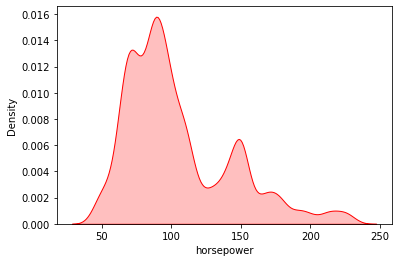

In [16]:
sns.kdeplot(x='horsepower', data=cars, bw_adjust=0.5, shade=True, color='red');

## Bivariate (2D)
(2 Dimensional KDE Plots)

In [17]:
sns.set_style('darkgrid')

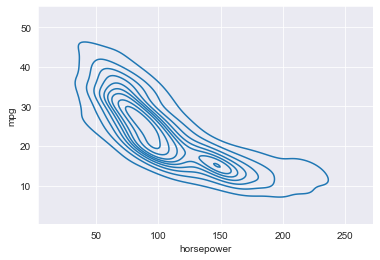

In [18]:
sns.kdeplot(cars.horsepower, cars.mpg);

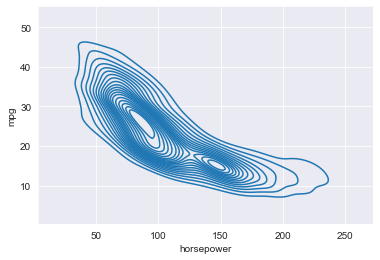

In [19]:
sns.kdeplot(cars.horsepower, cars.mpg, n_levels=20);

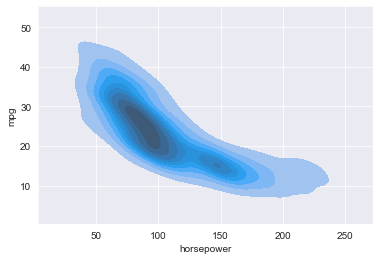

In [20]:
sns.kdeplot(cars.horsepower, cars.mpg, shade=True);

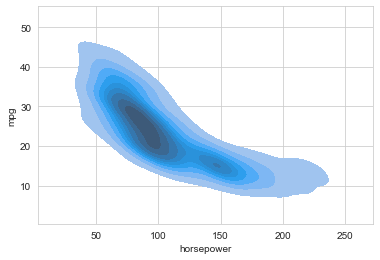

In [21]:
sns.set_style('whitegrid')

sns.kdeplot(cars.horsepower, cars.mpg, 
            shade=True,
            shade_lowest=False
           );

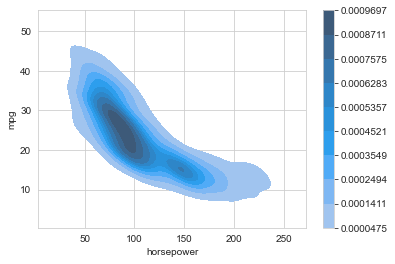

In [22]:
sns.kdeplot(cars.horsepower, cars.mpg, 
            shade=True, 
            shade_lowest=False,
            cbar=True
           );

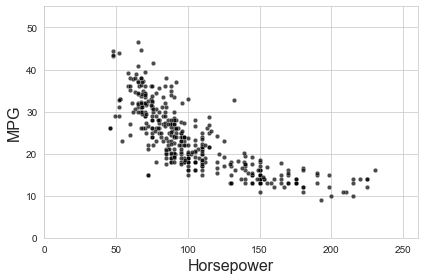

In [23]:
#sns.kdeplot(cars.horsepower, cars.mpg)
sns.scatterplot(cars.horsepower, cars.mpg, color='black', alpha=0.7, s=20)

plt.xlim(0, 260)
plt.ylim(0, 55)
plt.xlabel('Horsepower', fontsize=16)
plt.ylabel('MPG', fontsize=16)
plt.tight_layout();

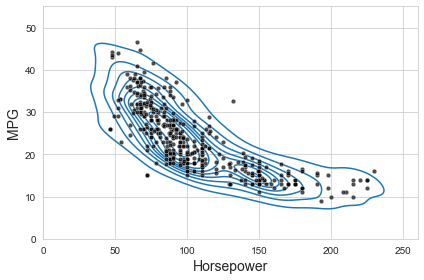

In [24]:
sns.kdeplot(cars.horsepower, cars.mpg)
sns.scatterplot(cars.horsepower, cars.mpg, color='black', alpha=0.7, s=20, zorder=10)

plt.xlim(0, 260)
plt.ylim(0, 55)
plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('MPG', fontsize=14)
plt.tight_layout();

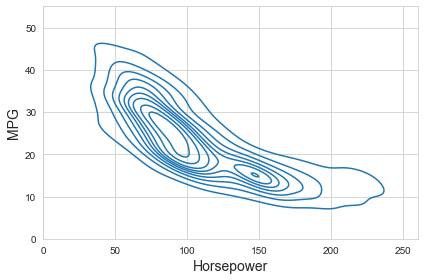

In [25]:
sns.kdeplot(cars.horsepower, cars.mpg)
#sns.scatterplot(cars.horsepower, cars.mpg, color='black', alpha=0.7, s=20, zorder=10)

plt.xlim(0, 260)
plt.ylim(0, 55)
plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('MPG', fontsize=14)
plt.tight_layout();

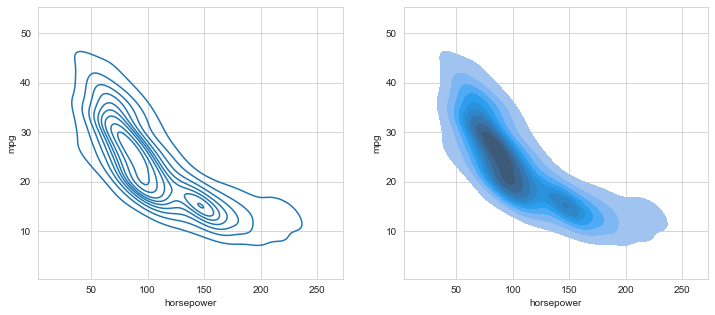

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data=cars , x= "horsepower", y="mpg")
plt.subplot(1,2,2)
sns.kdeplot(data=cars , x= "horsepower", y="mpg", shade=True);

## Bivariate KDEplot by Category

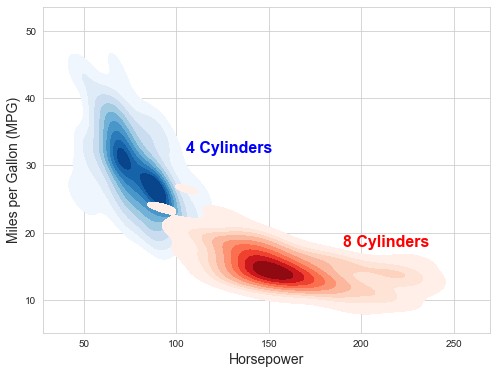

In [28]:
sns.set_style('whitegrid')

cyl_4 = cars[cars.cylinders==4]
cyl_8 = cars[cars.cylinders==8]

plt.figure(figsize=(8,6))

sns.kdeplot(cyl_4.horsepower, cyl_4.mpg,
            cmap="Blues", shade=True, shade_lowest=False)
sns.kdeplot(cyl_8.horsepower, cyl_8.mpg,
            cmap="Reds", shade=True, shade_lowest=False)

plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Miles per Gallon (MPG)', fontsize=14)

plt.annotate("4 Cylinders", (105, 32), color="blue", fontsize=16, fontweight='bold')
plt.annotate("8 Cylinders", (190, 18), color="red", fontsize=16, fontweight='bold');

## Other Figures that use KDE

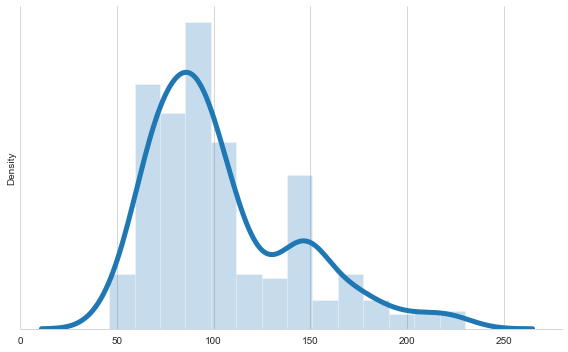

In [30]:
hp = cars.horsepower

plt.figure(figsize=(8,5))
sns.distplot(hp, kde_kws={"lw": 5}, hist_kws={'alpha': 0.25})

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

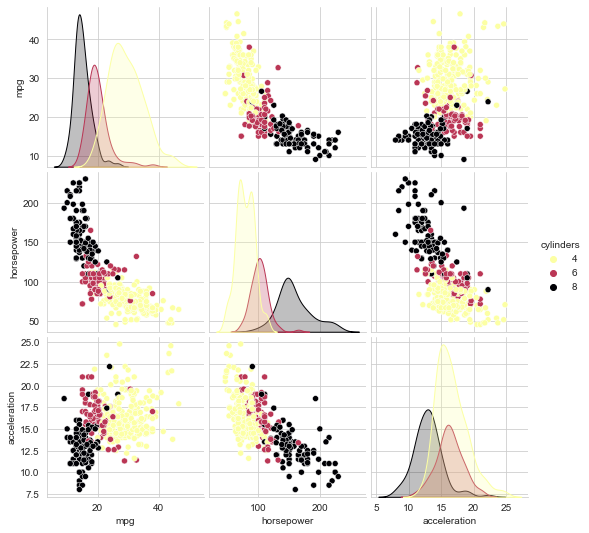

In [31]:
sns.pairplot(cars[cars.cylinders.isin([4,6,8])], 
             hue='cylinders', 
             vars=['mpg', 'horsepower', 'acceleration'], 
             palette='inferno_r'
            );

## EXAMPLES

In [7]:
pts = [1, 1.5, (7/3), 3, 3.75, 4.25, 5, 19/3, 8, 12]

In [8]:
pd.Series(pts).describe()

count    10.000000
mean      4.716667
std       3.341010
min       1.000000
25%       2.500000
50%       4.000000
75%       6.000000
max      12.000000
dtype: float64

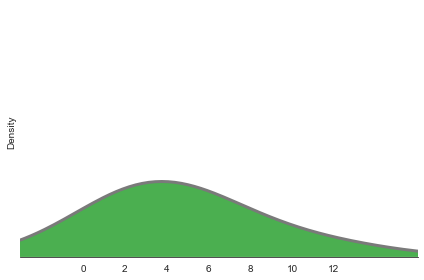

In [10]:
sns.set_style('white')

plt.figure(figsize=(6,4))

sns.kdeplot(pts, color='#4BAF50', shade=True, alpha=1, bw=1)
sns.kdeplot(pts, color='#7A7A7A', zorder=2, lw=3, bw=1)
sns.despine(left=True)

plt.xlim(-3, 16)
plt.ylim(None, 0.3)
plt.xticks(range(0,13,2))
plt.yticks([])
plt.tight_layout();